In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d03da3ebee8efe131771b0702de227e


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | fredericton
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | robertsport
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | okhotsk
Processing Record 8 of Set 1 | antalaha
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ambilobe
Processing Record 11 of Set 1 | ulaangom
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | sulangan
Processing Record 21 of Set 1 | umm lajj
Processing Record 22 of Set 1 | upernavik
Processing Record 23 o

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,44.71,76,40,11.50,CL,2022-05-04 20:27:52
1,New Norfolk,-42.7826,147.0587,40.71,83,46,1.97,AU,2022-05-04 20:27:52
2,Fredericton,45.9454,-66.6656,46.36,92,100,8.05,CA,2022-05-04 20:27:53
3,Port Alfred,-33.5906,26.8910,65.43,86,52,4.41,ZA,2022-05-04 20:27:54
4,Robertsport,6.7533,-11.3686,83.19,80,10,10.33,LR,2022-05-04 20:27:54
5,Saskylakh,71.9167,114.0833,19.94,93,100,5.75,RU,2022-05-04 20:25:49
6,Okhotsk,59.3833,143.3000,30.97,89,100,8.37,RU,2022-05-04 20:27:55
7,Antalaha,-14.9003,50.2788,75.74,78,70,8.59,MG,2022-05-04 20:27:56
8,Bredasdorp,-34.5322,20.0403,59.68,95,61,3.20,ZA,2022-05-04 20:25:34
9,Ambilobe,-13.2000,49.0500,71.65,87,30,3.91,MG,2022-05-04 20:27:57


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-05-04 20:27:52,-53.1500,-70.9167,44.71,76,40,11.50
1,New Norfolk,AU,2022-05-04 20:27:52,-42.7826,147.0587,40.71,83,46,1.97
2,Fredericton,CA,2022-05-04 20:27:53,45.9454,-66.6656,46.36,92,100,8.05
3,Port Alfred,ZA,2022-05-04 20:27:54,-33.5906,26.8910,65.43,86,52,4.41
4,Robertsport,LR,2022-05-04 20:27:54,6.7533,-11.3686,83.19,80,10,10.33
5,Saskylakh,RU,2022-05-04 20:25:49,71.9167,114.0833,19.94,93,100,5.75
6,Okhotsk,RU,2022-05-04 20:27:55,59.3833,143.3000,30.97,89,100,8.37
7,Antalaha,MG,2022-05-04 20:27:56,-14.9003,50.2788,75.74,78,70,8.59
8,Bredasdorp,ZA,2022-05-04 20:25:34,-34.5322,20.0403,59.68,95,61,3.20
9,Ambilobe,MG,2022-05-04 20:27:57,-13.2000,49.0500,71.65,87,30,3.91


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

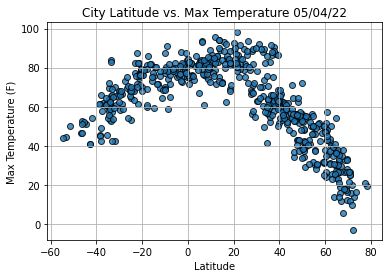

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

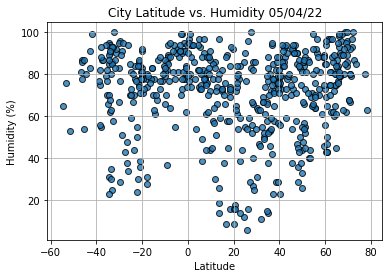

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()